# Exploratory data analysis (EDA) on Iris Dataset

In [1]:
#Importing libraries and loading the file

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

iris = pd.read_csv('iris.csv')
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [2]:
#Understanding the shape of the data
iris.shape

(150, 5)

In [3]:
#Columns Names
print(iris.columns)

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')


In [4]:
#Find null values
iris.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [5]:
#Explore features
iris.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
#Variety value count
iris['variety'].value_counts()

Virginica     50
Versicolor    50
Setosa        50
Name: variety, dtype: int64

In [7]:
iris.groupby('variety').mean()

,sepal.length,sepal.width,petal.length,petal.width
variety,,,,
Setosa,5.006,3.428,1.462,0.246
Versicolor,5.936,2.770,4.260,1.326
Virginica,6.588,2.974,5.552,2.026


In [8]:
#Get info about the dataset with datatype
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
# No of duplicates in the dataset
iris.duplicated().sum()

1

In [10]:
#the actual duplicate row/rows
iris[iris.duplicated()]

,sepal.length,sepal.width,petal.length,petal.width,variety
142,5.8,2.7,5.1,1.9,Virginica


Note : There is only 1 duplicate row and data is balanced(50-50-50), so we will ignore this

# Data Visualization

<AxesSubplot:title={'center':'variety Count'}, xlabel='variety', ylabel='count'>

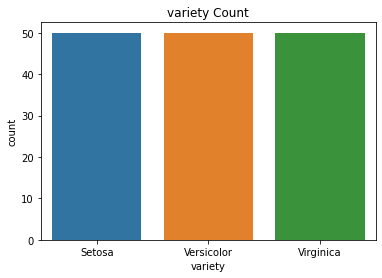

In [11]:
plt.title('variety Count')
sns.countplot(iris['variety'])

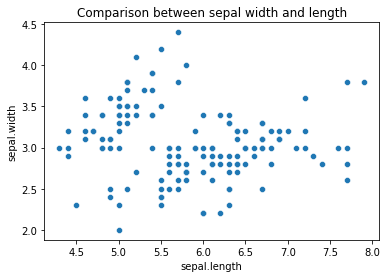

In [12]:
#Compare the sepal length and width columns
plt.title('Comparison between sepal width and length')
sns.scatterplot(iris['sepal.length'], iris['sepal.width']);

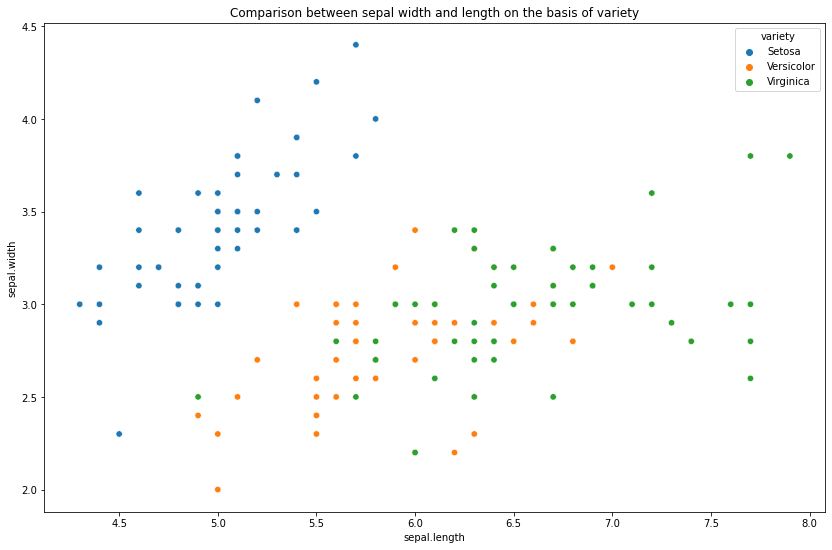

In [13]:
#Compare the sepal length and width columns on the basis of variety
plt.figure(figsize=(14,9))
plt.title('Comparison between sepal width and length on the basis of variety')
sns.scatterplot(iris['sepal.length'], iris['sepal.width'], hue = iris['variety'], s=40);
# s represents- marker size

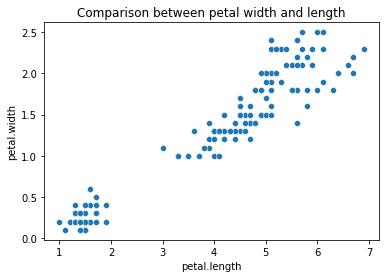

In [14]:
#Compare the petal length and width columns
plt.title('Comparison between petal width and length')
sns.scatterplot(iris['petal.length'], iris['petal.width']);

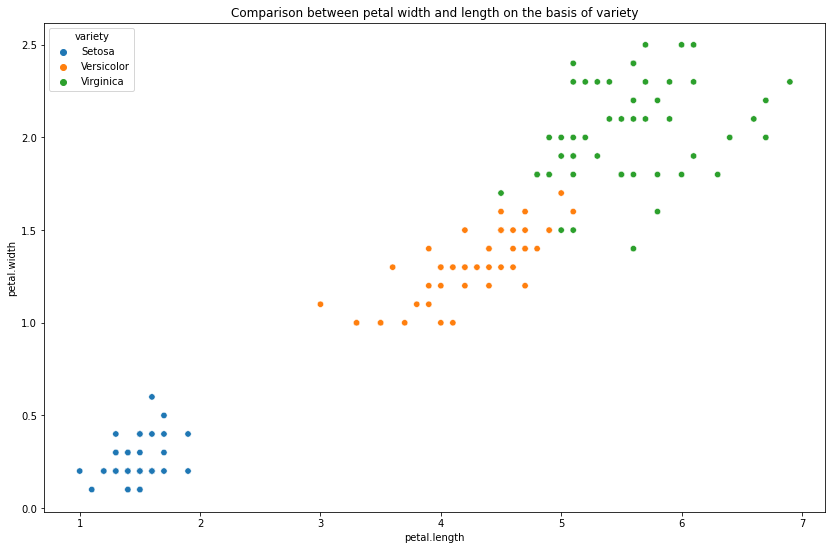

In [15]:
#Compare the petal length and width columns on the basis of variety
plt.figure(figsize=(14,9))
plt.title('Comparison between petal width and length on the basis of variety')
sns.scatterplot(iris['petal.length'], iris['petal.width'], hue = iris['variety'], s=40);
# s represents- marker size

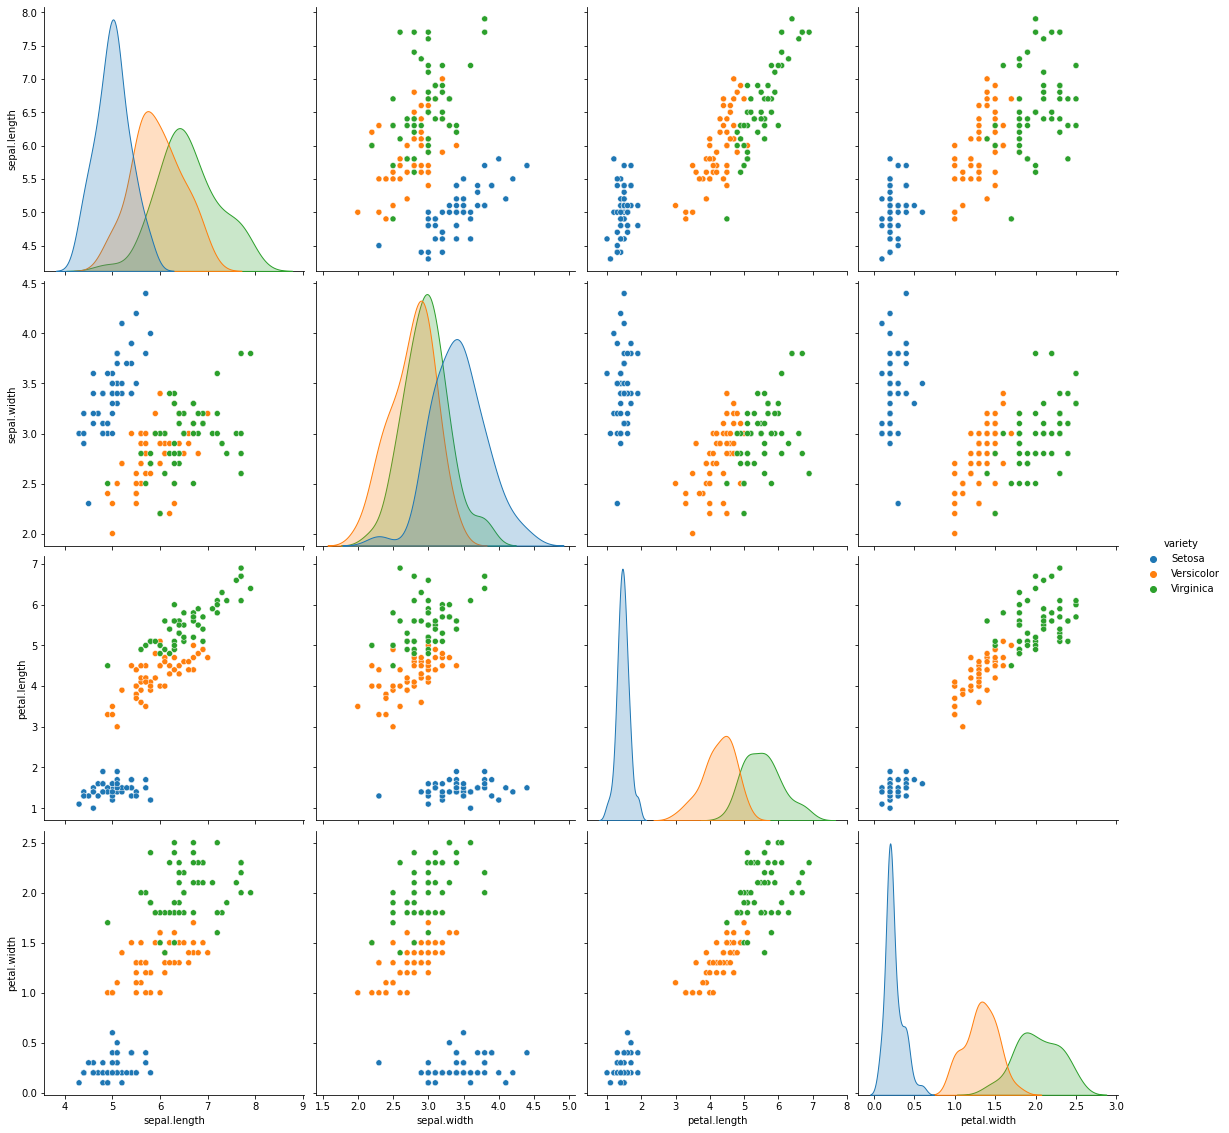

In [16]:
#Visualize all columns relationship with pair plot
sns.pairplot(iris,hue="variety",height=4)

Observation :
- We can see that the setosa variety has a large difference in its behaviour when compared to the other variety,
- it has smaller petal width and length, while its sepal width is high and its sepal length is low
- virginica and Versicolor have some overlap (almost linearly separable)
- Similar type of conclusions can be drawn for the other varieties 


# Histogram

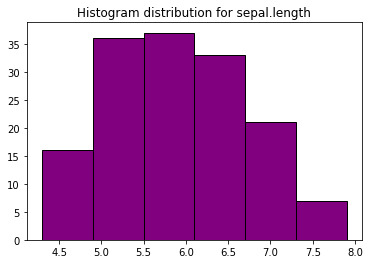

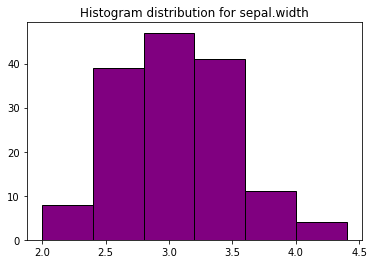

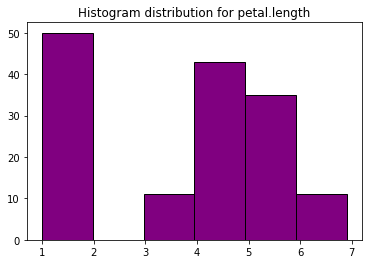

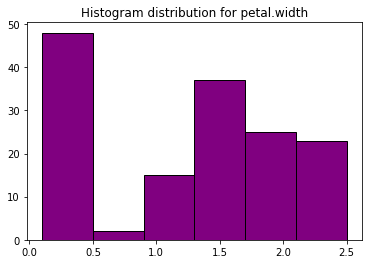

In [17]:
for i in ['sepal.length','sepal.width','petal.length','petal.width']:
    
#     plt.style.use('seaborn-white')
    plt.hist(iris[i],color='purple',bins=6,edgecolor='black')
    
    plt.title('Histogram distribution for {}'.format(i))
    plt.show()

Observation :
- The Highest frequency of sepal length is between 5.5 to 6 which is more than 35
- The Highest frequency of sepal width is at 3 which is more than 40
- The Highest frequency of petal length is between 1 to 2 which is around 50
- The lowest frequency of petal width is between 0.5 to 1 which is around 2

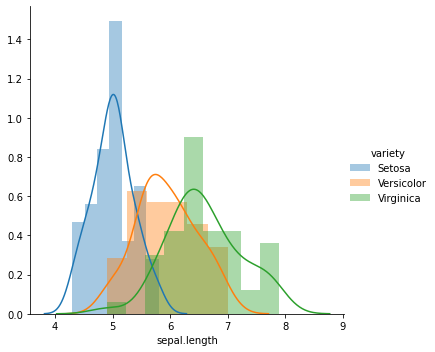

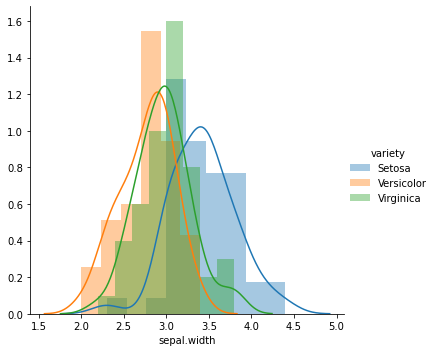

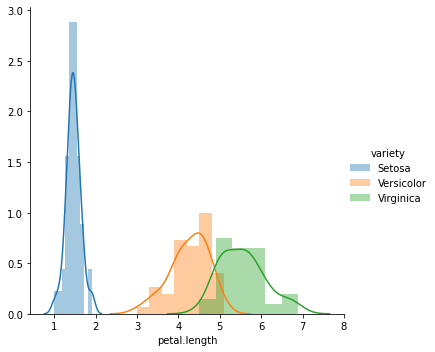

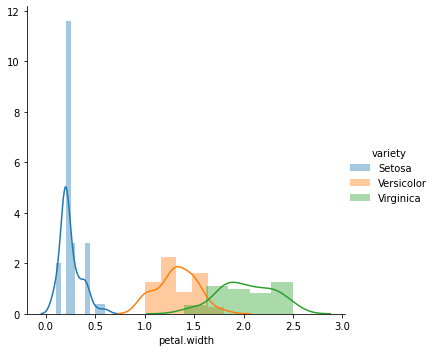

In [18]:
#plotting the probability density function(PDF) with each feature as a variable on X-axis and 
#it’s histogram and corresponding kernel density plot on Y-axis.

for i in ['sepal.length','sepal.width','petal.length','petal.width']:
    
    sns.FacetGrid(iris,hue="variety",height=5).map(sns.distplot,i).add_legend();

#Observation
1. Sepal length -
   Here we can’t separate any class because all of them are overlapped
2. Sepal width -
   As we can see virginica and versicolor are fully overlapped
3. Petal length -
   The setosa are better separable,
   There is overlap between vericolor and virginca
4. Petal Width -
   The setosa are better separable with each other,
   There is minor overlap between vericolor and virginca

# Encode the target variable

In [19]:
# label_encoder object knows how to understand word labels
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'variety'.
iris['variety']= label_encoder.fit_transform(iris['variety'])

iris['variety'].unique()

array([0, 1, 2])

In [20]:
iris.head(10)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


Setosa       -   0
Versicolor   -   1
Virginica    -   2

In [21]:
#Variety value count
iris['variety'].value_counts()

0    50
1    50
2    50
Name: variety, dtype: int64

In [22]:
iris.to_csv('iris_cleaned_1.csv', index=False)

# Split into train, validation, and test set

1) 60-20-20

In [23]:
features = iris.drop('variety', axis=1)
labels = iris['variety']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [24]:
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(labels), 2))

0.6
0.2
0.2


# Write data

In [25]:
X_train.to_csv('train_features.csv', index=False)
X_val.to_csv('val_features.csv', index=False)
X_test.to_csv('test_features.csv', index=False)

y_train.to_csv('train_labels.csv', index=False)
y_val.to_csv('val_labels.csv', index=False)
y_test.to_csv('test_labels.csv', index=False)

# KFold Cross Validation

In [26]:
#K-fold cross validation on training data
tr_features = pd.read_csv('train_features.csv')
tr_labels = pd.read_csv('train_labels.csv')

In [27]:
#after initializing a random forest classifier, feed it to sklearn’s cross_validate function
rf = RandomForestClassifier()

scores = cross_val_score(rf, tr_features, tr_labels.values.ravel(), cv=5)
#5-fold cross varidation
#ravel is used to convert pandas column vector to array

In [28]:
#The score object stores the out of sample accuracy of each of its trained models
scores

array([0.94444444, 0.72222222, 1.        , 0.94444444, 0.94444444])

In [29]:
print("Avg score in %: {}%".format(scores.mean() * 100))

Avg score in %: 91.11111111111111%


In [30]:
val_features = pd.read_csv('val_features.csv')
val_labels = pd.read_csv('val_labels.csv')

te_features = pd.read_csv('test_features.csv')
te_labels = pd.read_csv('test_labels.csv')

# Hyperparameter tuning

In [31]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [32]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 10, 50, 100],
    'max_depth': [2, 10, 20, None]
}

cv1_RF = GridSearchCV(rf, parameters, cv=5)
cv1_RF.fit(tr_features, tr_labels.values.ravel())

print_results(cv1_RF)

BEST PARAMS: {'max_depth': 20, 'n_estimators': 10}

0.922 (+/-0.151) for {'max_depth': 2, 'n_estimators': 5}
0.911 (+/-0.206) for {'max_depth': 2, 'n_estimators': 10}
0.922 (+/-0.206) for {'max_depth': 2, 'n_estimators': 50}
0.911 (+/-0.194) for {'max_depth': 2, 'n_estimators': 100}
0.889 (+/-0.199) for {'max_depth': 10, 'n_estimators': 5}
0.922 (+/-0.206) for {'max_depth': 10, 'n_estimators': 10}
0.922 (+/-0.206) for {'max_depth': 10, 'n_estimators': 50}
0.922 (+/-0.206) for {'max_depth': 10, 'n_estimators': 100}
0.911 (+/-0.194) for {'max_depth': 20, 'n_estimators': 5}
0.933 (+/-0.215) for {'max_depth': 20, 'n_estimators': 10}
0.922 (+/-0.206) for {'max_depth': 20, 'n_estimators': 50}
0.933 (+/-0.215) for {'max_depth': 20, 'n_estimators': 100}
0.9 (+/-0.191) for {'max_depth': None, 'n_estimators': 5}
0.933 (+/-0.215) for {'max_depth': None, 'n_estimators': 10}
0.9 (+/-0.178) for {'max_depth': None, 'n_estimators': 50}
0.922 (+/-0.206) for {'max_depth': None, 'n_estimators': 100}


In [33]:
lr = LogisticRegression()
parameters = {
    'C': [0.001, 0.01, 0.1, 1]
}

cv2_LR = GridSearchCV(lr, parameters, cv=5)
cv2_LR.fit(tr_features, tr_labels.values.ravel())

print_results(cv2_LR)

BEST PARAMS: {'C': 1}

0.622 (+/-0.333) for {'C': 0.001}
0.833 (+/-0.199) for {'C': 0.01}
0.911 (+/-0.166) for {'C': 0.1}
0.944 (+/-0.172) for {'C': 1}


In [34]:
svc = SVC()
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}

cv3_SVM = GridSearchCV(svc, parameters, cv=5)
cv3_SVM.fit(tr_features, tr_labels.values.ravel())

print_results(cv3_SVM)

BEST PARAMS: {'C': 1, 'kernel': 'linear'}

0.922 (+/-0.113) for {'C': 0.1, 'kernel': 'linear'}
0.8 (+/-0.218) for {'C': 0.1, 'kernel': 'rbf'}
0.956 (+/-0.083) for {'C': 1, 'kernel': 'linear'}
0.922 (+/-0.113) for {'C': 1, 'kernel': 'rbf'}
0.933 (+/-0.109) for {'C': 10, 'kernel': 'linear'}
0.944 (+/-0.07) for {'C': 10, 'kernel': 'rbf'}


In [35]:
mlp = MLPClassifier()
parameters = {
    'hidden_layer_sizes': [(100,),(200,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'learning_rate': ['constant','invscaling','adaptive']
    }

cv4_MLP = GridSearchCV(mlp, parameters, cv=5)
cv4_MLP.fit(tr_features, tr_labels.values.ravel())

print_results(cv4_MLP)

BEST PARAMS: {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive'}

0.967 (+/-0.089) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
0.967 (+/-0.089) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling'}
0.978 (+/-0.089) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive'}
0.967 (+/-0.089) for {'activation': 'relu', 'hidden_layer_sizes': (200,), 'learning_rate': 'constant'}
0.956 (+/-0.083) for {'activation': 'relu', 'hidden_layer_sizes': (200,), 'learning_rate': 'invscaling'}
0.967 (+/-0.089) for {'activation': 'relu', 'hidden_layer_sizes': (200,), 'learning_rate': 'adaptive'}
0.944 (+/-0.122) for {'activation': 'tanh', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
0.967 (+/-0.089) for {'activation': 'tanh', 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling'}
0.978 (+/-0.089) for {'activation': 'tanh', 'hidden_layer_sizes': (100,), 

In [36]:
gb = GradientBoostingClassifier()
parameters = {
    'n_estimators': [5, 50, 250, 500],
    'max_depth': [0.05, 1, 3],
    'learning_rate': [0.01, 0.1, 1, 10, 100]
}

cv5_GB = GridSearchCV(gb, parameters, cv=5)
cv5_GB.fit(tr_features, tr_labels.values.ravel())

print_results(cv5_GB)

BEST PARAMS: {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}

0.333 (+/-0.0) for {'learning_rate': 0.01, 'max_depth': 0.05, 'n_estimators': 5}
0.333 (+/-0.0) for {'learning_rate': 0.01, 'max_depth': 0.05, 'n_estimators': 50}
0.333 (+/-0.0) for {'learning_rate': 0.01, 'max_depth': 0.05, 'n_estimators': 250}
0.333 (+/-0.0) for {'learning_rate': 0.01, 'max_depth': 0.05, 'n_estimators': 500}
0.6 (+/-0.452) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.9 (+/-0.191) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.933 (+/-0.215) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.922 (+/-0.206) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.711 (+/-0.247) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.889 (+/-0.172) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.889 (+/-0.172) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.9 (+/-0.191) for {'learning_ra

In [37]:
print("Alorithms  \n\
RF  : {} \n\
LR  : {} \n\
SVM : {} \n\
MLP : {} \n\
GB  : {} ". format(cv1_RF,cv2_LR,cv3_SVM,cv4_MLP,cv5_GB))

Alorithms  
RF  : GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 10, 20, None],
                         'n_estimators': [5, 10, 50, 100]}) 
LR  : GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1]}) 
SVM : GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}) 
MLP : GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'activation': ['relu', 'tanh', 'logistic'],
                         'hidden_layer_sizes': [(100,), (200,)],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive']}) 
GB  : GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10, 100],
                         'max_depth': [0.05, 1, 3],
                         'n_estimators': [5, 50, 250, 500]}) 


In [38]:
#cv=['cv1_RF','cv2_LR','cv3_SVM','cv4_MLP','cv5_GB']
RF = cv1_RF.best_estimator_
LR = cv2_LR.best_estimator_
SVM = cv3_SVM.best_estimator_
MLP = cv4_MLP.best_estimator_
GB = cv5_GB.best_estimator_

# for i in ['RF','LR','SVM','MLP','GB']:
joblib.dump(cv1_RF.best_estimator_,'RF_model.pkl')
joblib.dump(cv2_LR.best_estimator_,'LR_model.pkl')
joblib.dump(cv3_SVM.best_estimator_,'SVM_model.pkl')
joblib.dump(cv4_MLP.best_estimator_,'MLP_model.pkl')
joblib.dump(cv5_GB.best_estimator_,'GB_model.pkl')

['GB_model.pkl']

In [39]:
models = {}

for mdl in ['RF','LR','SVM','MLP','GB']:
    models[mdl] = joblib.load('{}_model.pkl'.format(mdl))

In [40]:
models

{'RF': RandomForestClassifier(max_depth=20, n_estimators=10),
 'LR': LogisticRegression(C=1),
 'SVM': SVC(C=1, kernel='linear'),
 'MLP': MLPClassifier(learning_rate='adaptive'),
 'GB': GradientBoostingClassifier(learning_rate=0.01, max_depth=1, n_estimators=250)}

# Evaluate models on the validation set

In [41]:
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    pos_label = 1
    accuracy = round(accuracy_score(labels, pred), 3)
#     precision = round(precision_score(labels, pred, pos_label='positive' and average!='binary'), 3)
#     recall = round(recall_score(labels, pred, pos_label='positive' and average!='binary'), 3)
    precision = round(precision_score(labels, pred, labels=[pos_label], average='micro'), 3)
    recall = round(recall_score(labels, pred, labels=[pos_label], average='micro'), 3)

    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                   accuracy,
                                                                                   precision,
                                                                                   recall,
                                                                                   round((end - start)*1000, 1)))

In [42]:
# for name, mdl in models.items():
#     evaluate_model(name, mdl, val_features, val_labels)
models.items()

dict_items([('RF', RandomForestClassifier(max_depth=20, n_estimators=10)), ('LR', LogisticRegression(C=1)), ('SVM', SVC(C=1, kernel='linear')), ('MLP', MLPClassifier(learning_rate='adaptive')), ('GB', GradientBoostingClassifier(learning_rate=0.01, max_depth=1, n_estimators=250))])

In [43]:
for name, mdl in models.items():
    evaluate_model(name, mdl, val_features, val_labels)

RF -- Accuracy: 0.967 / Precision: 0.929 / Recall: 1.0 / Latency: 0.0ms
LR -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 8.2ms
SVM -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 0.0ms
MLP -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 0.0ms
GB -- Accuracy: 0.967 / Precision: 0.929 / Recall: 1.0 / Latency: 0.0ms


In [44]:
#Best model we need to  use for test data, but almost all the models are giving high accuracy, so implemented on test data
for name, mdl in models.items():
    evaluate_model(name, mdl, te_features, te_labels)

RF -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 8.0ms
LR -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 0.0ms
SVM -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 0.0ms
MLP -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 0.0ms
GB -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 8.0ms


# Split into train, validation, and test set

2) 80-10-10

In [45]:
features = iris.drop('variety', axis=1)
labels = iris['variety']

X_train2, X_test2, y_train2, y_test2 = train_test_split(features, labels, test_size=0.2, random_state=42)
X_test2, X_val2, y_test2, y_val2 = train_test_split(X_test2, y_test2, test_size=0.5, random_state=42)

In [46]:
for dataset in [y_train2, y_val2, y_test2]:
    print(round(len(dataset) / len(labels), 2))

0.8
0.1
0.1


In [47]:
X_train2.to_csv('train_features2.csv', index=False)
X_val2.to_csv('val_features2.csv', index=False)
X_test2.to_csv('test_features2.csv', index=False)

y_train2.to_csv('train_labels2.csv', index=False)
y_val2.to_csv('val_labels2.csv', index=False)
y_test2.to_csv('test_labels2.csv', index=False)

# KFold Cross Validation

In [48]:
tr_features2 = pd.read_csv('train_features2.csv')
tr_labels2 = pd.read_csv('train_labels2.csv')

In [49]:
#after initializing a random forest classifier, feed it to sklearn’s cross_validate function
rf = RandomForestClassifier()

scores2 = cross_val_score(rf, tr_features2, tr_labels2.values.ravel(), cv=5)
#5-fold cross varidation
#ravel is used to convert pandas column vector to array

In [50]:
#The score object stores the out of sample accuracy of each of its trained models
scores2

array([0.95833333, 1.        , 0.83333333, 1.        , 0.95833333])

In [51]:
print("Avg score in %: {}%".format(scores2.mean() * 100))

Avg score in %: 95.0%


In [52]:
val_features2 = pd.read_csv('val_features2.csv')
val_labels2 = pd.read_csv('val_labels2.csv')

te_features2 = pd.read_csv('test_features2.csv')
te_labels2 = pd.read_csv('test_labels2.csv')

# Hyperparameter tuning

In [53]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 10, 50, 100],
    'max_depth': [2, 10, 20, None]
}

cv1_RF2 = GridSearchCV(rf, parameters, cv=5)
cv1_RF2.fit(tr_features2, tr_labels2.values.ravel())

print_results(cv1_RF2)

BEST PARAMS: {'max_depth': 20, 'n_estimators': 100}

0.933 (+/-0.113) for {'max_depth': 2, 'n_estimators': 5}
0.925 (+/-0.143) for {'max_depth': 2, 'n_estimators': 10}
0.942 (+/-0.155) for {'max_depth': 2, 'n_estimators': 50}
0.942 (+/-0.163) for {'max_depth': 2, 'n_estimators': 100}
0.933 (+/-0.113) for {'max_depth': 10, 'n_estimators': 5}
0.925 (+/-0.178) for {'max_depth': 10, 'n_estimators': 10}
0.95 (+/-0.122) for {'max_depth': 10, 'n_estimators': 50}
0.95 (+/-0.122) for {'max_depth': 10, 'n_estimators': 100}
0.917 (+/-0.139) for {'max_depth': 20, 'n_estimators': 5}
0.942 (+/-0.113) for {'max_depth': 20, 'n_estimators': 10}
0.933 (+/-0.1) for {'max_depth': 20, 'n_estimators': 50}
0.958 (+/-0.091) for {'max_depth': 20, 'n_estimators': 100}
0.933 (+/-0.145) for {'max_depth': None, 'n_estimators': 5}
0.942 (+/-0.155) for {'max_depth': None, 'n_estimators': 10}
0.942 (+/-0.113) for {'max_depth': None, 'n_estimators': 50}
0.95 (+/-0.122) for {'max_depth': None, 'n_estimators': 100}


In [54]:
lr = LogisticRegression()
parameters = {
    'C': [0.001, 0.01, 0.1, 1]
}

cv2_LR2 = GridSearchCV(lr, parameters, cv=5)
cv2_LR2.fit(tr_features2, tr_labels2.values.ravel())

print_results(cv2_LR2)

BEST PARAMS: {'C': 1}

0.817 (+/-0.201) for {'C': 0.001}
0.858 (+/-0.194) for {'C': 0.01}
0.933 (+/-0.113) for {'C': 0.1}
0.967 (+/-0.097) for {'C': 1}


In [55]:
svc = SVC()
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}

cv3_SVM2 = GridSearchCV(svc, parameters, cv=5)
cv3_SVM2.fit(tr_features2, tr_labels2.values.ravel())

print_results(cv3_SVM2)

BEST PARAMS: {'C': 1, 'kernel': 'linear'}

0.942 (+/-0.125) for {'C': 0.1, 'kernel': 'linear'}
0.892 (+/-0.155) for {'C': 0.1, 'kernel': 'rbf'}
0.958 (+/-0.091) for {'C': 1, 'kernel': 'linear'}
0.95 (+/-0.122) for {'C': 1, 'kernel': 'rbf'}
0.95 (+/-0.122) for {'C': 10, 'kernel': 'linear'}
0.95 (+/-0.122) for {'C': 10, 'kernel': 'rbf'}


In [56]:
mlp = MLPClassifier()
parameters = {
    'hidden_layer_sizes': [(100,),(200,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'learning_rate': ['constant','invscaling','adaptive']
    }

cv4_MLP2 = GridSearchCV(mlp, parameters, cv=5)
cv4_MLP2.fit(tr_features2, tr_labels2.values.ravel())

print_results(cv4_MLP2)

BEST PARAMS: {'activation': 'tanh', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}

0.967 (+/-0.097) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
0.975 (+/-0.1) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling'}
0.975 (+/-0.1) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive'}
0.967 (+/-0.097) for {'activation': 'relu', 'hidden_layer_sizes': (200,), 'learning_rate': 'constant'}
0.975 (+/-0.1) for {'activation': 'relu', 'hidden_layer_sizes': (200,), 'learning_rate': 'invscaling'}
0.967 (+/-0.097) for {'activation': 'relu', 'hidden_layer_sizes': (200,), 'learning_rate': 'adaptive'}
0.983 (+/-0.067) for {'activation': 'tanh', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
0.975 (+/-0.067) for {'activation': 'tanh', 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling'}
0.983 (+/-0.067) for {'activation': 'tanh', 'hidden_layer_sizes': (100,), 'learn

In [57]:
gb = GradientBoostingClassifier()
parameters = {
    'n_estimators': [5, 50, 250, 500],
    'max_depth': [0.05, 1, 3],
    'learning_rate': [0.01, 0.1, 1, 10, 100]
}

cv5_GB2 = GridSearchCV(gb, parameters, cv=5)
cv5_GB2.fit(tr_features2, tr_labels2.values.ravel())

print_results(cv5_GB2)

BEST PARAMS: {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}

0.333 (+/-0.0) for {'learning_rate': 0.01, 'max_depth': 0.05, 'n_estimators': 5}
0.333 (+/-0.0) for {'learning_rate': 0.01, 'max_depth': 0.05, 'n_estimators': 50}
0.333 (+/-0.0) for {'learning_rate': 0.01, 'max_depth': 0.05, 'n_estimators': 250}
0.333 (+/-0.0) for {'learning_rate': 0.01, 'max_depth': 0.05, 'n_estimators': 500}
0.858 (+/-0.208) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.908 (+/-0.122) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.958 (+/-0.091) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.95 (+/-0.082) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.942 (+/-0.125) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.95 (+/-0.122) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.95 (+/-0.122) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.942 (+/-0.113) for {'learning

In [58]:
#cv=['cv1_RF','cv2_LR','cv3_SVM','cv4_MLP','cv5_GB']
RF2 = cv1_RF2.best_estimator_
LR2 = cv2_LR2.best_estimator_
SVM2 = cv3_SVM2.best_estimator_
MLP2 = cv4_MLP2.best_estimator_
GB2 = cv5_GB2.best_estimator_

# for i in ['RF','LR','SVM','MLP','GB']:
joblib.dump(cv1_RF2.best_estimator_,'RF_model2.pkl')
joblib.dump(cv2_LR2.best_estimator_,'LR_model2.pkl')
joblib.dump(cv3_SVM2.best_estimator_,'SVM_model2.pkl')
joblib.dump(cv4_MLP2.best_estimator_,'MLP_model2.pkl')
joblib.dump(cv5_GB2.best_estimator_,'GB_model2.pkl')

['GB_model2.pkl']

In [59]:
models = {}

for mdl in ['RF','LR','SVM','MLP','GB']:
    models[mdl] = joblib.load('{}_model2.pkl'.format(mdl))

In [60]:
models

{'RF': RandomForestClassifier(max_depth=20),
 'LR': LogisticRegression(C=1),
 'SVM': SVC(C=1, kernel='linear'),
 'MLP': MLPClassifier(activation='tanh'),
 'GB': GradientBoostingClassifier(learning_rate=0.01, max_depth=1, n_estimators=250)}

# Evaluate models on the validation and test set

In [61]:
models.items()

dict_items([('RF', RandomForestClassifier(max_depth=20)), ('LR', LogisticRegression(C=1)), ('SVM', SVC(C=1, kernel='linear')), ('MLP', MLPClassifier(activation='tanh')), ('GB', GradientBoostingClassifier(learning_rate=0.01, max_depth=1, n_estimators=250))])

In [62]:
for name, mdl in models.items():
    evaluate_model(name, mdl, val_features2, val_labels2)

RF -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 8.0ms
LR -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 0.0ms
SVM -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 0.0ms
MLP -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 0.0ms
GB -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 0.0ms


In [63]:
#Best model we need to  use for test data, but almost all the models are giving high accuracy, so implemented on test data
for name, mdl in models.items():
    evaluate_model(name, mdl, te_features2, te_labels2)

RF -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 16.0ms
LR -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 0.0ms
SVM -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 0.0ms
MLP -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 0.0ms
GB -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 0.0ms


Ans: We trained the data on train set and validated  & tested on validation and test set respectively.
    
We split the data in 2 sets: 60-20-20 and 80-10-10
    
Initially, we checked the accuracy using 5 fold cross validation on training data.
So if k = 5 and dataset has 150 observations,
Each of the 5 folds would have 30 observations
I tried with various values of k, but 5 was is showing more accurate value.


Apart from this, i've not used header option as, it was showing some errors.
-Iris data, which is provided, is balanced data, so accuracy for all the used models is 1 or almost 1.
Here, from the current result, i have observed that 80-10-10 split shows more latency and accuracy rate as compared to 60-20-20 model AND RF models shows high latency(more time taken to process) as compared to other models.